In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np
import pylab
%matplotlib inline
import matplotlib.pyplot as p 
p.show()
import re

In [187]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    #'axes.prop_cycle': cycler('color', ['#035272','#01ACDC', '#6C929B', '#7AC3E8','#A5ACB2', '#CC8164', '#D56248']),
    'axes.prop_cycle': cycler('color', ['#008fd5','green']),
    'axes.spines.left'   : True,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right'  : False,
    'axes.labelcolor'  :'#4D6168',
    'axes.grid'           : True,
    'axes.axisbelow'      : True,
    
    'font.sans-serif': 'Arial Rounded MT Bold',
    'font.family': 'sans-serif',
    
    'text.color': '#4D6168',
    
    'xtick.color' : '#4D6168',
    'ytick.color' : '#4D6168',
    
    'grid.color':  '#83A8AE',
    
    'legend.edgecolor': 'white',
 
})

In [26]:
df = pd.read_csv("Ruokatilausexcel.csv")

In [27]:
df

,Firm,Price Meat 2,Price Meat 4,Price Veg 2,Price Veg 4,Meal 1 Cal,Meal 1 Prot,Meal 1 Salt,Meal 1 Fat,Meal 2 Cal,...,Veg 1 Fat,Veg 2 Cal,Veg 2 Prot,Veg 2 Salt,Veg 2 Fat,Veg 3 Cal,Veg 3 Prot,Veg 3 Salt,Veg 3 Fat,Notes
0,Blue Apron,9.99,7.99,9.99,7.99,720,40,52,51,640,...,46,970,20,45,78,590,25,61,54,NaN
1,Green Chef,13.49,12.99,10.49,NaN,830,47,31,23,650,...,33,540,24,47,28,730,33,31,41,NaN
2,Sun Basket,11.99,11.99,11.99,11.99,430,38,NaN,40,480,...,40,560,39,NaN,28,680,26,NaN,65,suolaa ei voi laittaa koska itse lisättyä ei o...
3,Hello Fresh,7.99,6.99,7.99,7.99,670,47,830mg,28g,880,...,28g,740,36,520mg,29g,490,13,590mg,17g,NaN


In [28]:
df['meat_prot'] = round((df['Meal 1 Prot'] + df['Meal 2 Prot'] + df['Meal 3 Prot'])/3)

In [29]:
df

,Firm,Price Meat 2,Price Meat 4,Price Veg 2,Price Veg 4,Meal 1 Cal,Meal 1 Prot,Meal 1 Salt,Meal 1 Fat,Meal 2 Cal,...,Veg 2 Cal,Veg 2 Prot,Veg 2 Salt,Veg 2 Fat,Veg 3 Cal,Veg 3 Prot,Veg 3 Salt,Veg 3 Fat,Notes,meat_prot
0,Blue Apron,9.99,7.99,9.99,7.99,720,40,52,51,640,...,970,20,45,78,590,25,61,54,NaN,41.0
1,Green Chef,13.49,12.99,10.49,NaN,830,47,31,23,650,...,540,24,47,28,730,33,31,41,NaN,38.0
2,Sun Basket,11.99,11.99,11.99,11.99,430,38,NaN,40,480,...,560,39,NaN,28,680,26,NaN,65,suolaa ei voi laittaa koska itse lisättyä ei o...,38.0
3,Hello Fresh,7.99,6.99,7.99,7.99,670,47,830mg,28g,880,...,740,36,520mg,29g,490,13,590mg,17g,NaN,42.0


In [30]:
df['veg_prot'] = round((df['Veg 1 Prot'] + df['Veg 2 Prot'] + df['Veg 3 Prot'])/3)
df


,Firm,Price Meat 2,Price Meat 4,Price Veg 2,Price Veg 4,Meal 1 Cal,Meal 1 Prot,Meal 1 Salt,Meal 1 Fat,Meal 2 Cal,...,Veg 2 Prot,Veg 2 Salt,Veg 2 Fat,Veg 3 Cal,Veg 3 Prot,Veg 3 Salt,Veg 3 Fat,Notes,meat_prot,veg_prot
0,Blue Apron,9.99,7.99,9.99,7.99,720,40,52,51,640,...,20,45,78,590,25,61,54,NaN,41.0,22.0
1,Green Chef,13.49,12.99,10.49,NaN,830,47,31,23,650,...,24,47,28,730,33,31,41,NaN,38.0,25.0
2,Sun Basket,11.99,11.99,11.99,11.99,430,38,NaN,40,480,...,39,NaN,28,680,26,NaN,65,suolaa ei voi laittaa koska itse lisättyä ei o...,38.0,30.0
3,Hello Fresh,7.99,6.99,7.99,7.99,670,47,830mg,28g,880,...,36,520mg,29g,490,13,590mg,17g,NaN,42.0,26.0


In [31]:
df['meat_prot_price'] = round(df['Price Meat 2']/df['meat_prot'],2)
df['veg_prot_price'] = round(df['Price Veg 2']/df['veg_prot'],2)
df

,Firm,Price Meat 2,Price Meat 4,Price Veg 2,Price Veg 4,Meal 1 Cal,Meal 1 Prot,Meal 1 Salt,Meal 1 Fat,Meal 2 Cal,...,Veg 2 Fat,Veg 3 Cal,Veg 3 Prot,Veg 3 Salt,Veg 3 Fat,Notes,meat_prot,veg_prot,meat_prot_price,veg_prot_price
0,Blue Apron,9.99,7.99,9.99,7.99,720,40,52,51,640,...,78,590,25,61,54,NaN,41.0,22.0,0.24,0.45
1,Green Chef,13.49,12.99,10.49,NaN,830,47,31,23,650,...,28,730,33,31,41,NaN,38.0,25.0,0.36,0.42
2,Sun Basket,11.99,11.99,11.99,11.99,430,38,NaN,40,480,...,28,680,26,NaN,65,suolaa ei voi laittaa koska itse lisättyä ei o...,38.0,30.0,0.32,0.40
3,Hello Fresh,7.99,6.99,7.99,7.99,670,47,830mg,28g,880,...,29g,490,13,590mg,17g,NaN,42.0,26.0,0.19,0.31


In [32]:


df.plot(x='Price Meat 2', y='meat_prot', kind='scatter')

In [33]:

df.plot(x='Price Veg 2', y='veg_prot', kind='scatter')

In [4]:
df_blue = pd.read_csv("blueapron_salt.csv")

In [5]:
df_blue

,Company,Veg,Salt,Food
0,Blue Apron,No,39,Seared Steak on Cheese Polenta
1,Blue Apron,No,50,Tuscan Pork Chops
2,Blue Apron,Yes,53,Crispy Veese Quesadillas
3,Blue Apron,No,43,Blackened Cajun Chicken
4,Blue Apron,No,80,Shrimp & Pesto Cnocchi
5,Blue Apron,No,46,Spiced Chicken & Couscous
6,Blue Apron,No,34,Seared Cod & Peppers over Creamy Rice
7,Blue Apron,Yes,28,Sicilian-Style Orecchierette
8,Blue Apron,No,38,Seared Steaks over Cheese Polenta
9,Blue Apron,No,67,Spicy BBQ Chicken Drumsticks


In [16]:
veg_type = []

for row in df_blue.Veg:
    if row in ['No']:
        veg_type.append(1)
    else:
        veg_type.append(2)

df_blue['veg_type'] = veg_type

In [18]:
df_blue

,Company,Veg,Salt,Food,veg_type
0,Blue Apron,No,39,Seared Steak on Cheese Polenta,1
1,Blue Apron,No,50,Tuscan Pork Chops,1
2,Blue Apron,Yes,53,Crispy Veese Quesadillas,2
3,Blue Apron,No,43,Blackened Cajun Chicken,1
4,Blue Apron,No,80,Shrimp & Pesto Cnocchi,1
5,Blue Apron,No,46,Spiced Chicken & Couscous,1
6,Blue Apron,No,34,Seared Cod & Peppers over Creamy Rice,1
7,Blue Apron,Yes,28,Sicilian-Style Orecchierette,2
8,Blue Apron,No,38,Seared Steaks over Cheese Polenta,1
9,Blue Apron,No,67,Spicy BBQ Chicken Drumsticks,1


In [153]:
df_blue['salt_mg'] = df_blue['Salt']/100*2400

In [154]:
df_blue

,Company,Veg,Salt,Food,veg_type,salt_mg
0,Blue Apron,No,39,Seared Steak on Cheese Polenta,1,936.0
1,Blue Apron,No,50,Tuscan Pork Chops,1,1200.0
2,Blue Apron,Yes,53,Crispy Veese Quesadillas,2,1272.0
3,Blue Apron,No,43,Blackened Cajun Chicken,1,1032.0
4,Blue Apron,No,80,Shrimp & Pesto Cnocchi,1,1920.0
5,Blue Apron,No,46,Spiced Chicken & Couscous,1,1104.0
6,Blue Apron,No,34,Seared Cod & Peppers over Creamy Rice,1,816.0
7,Blue Apron,Yes,28,Sicilian-Style Orecchierette,2,672.0
8,Blue Apron,No,38,Seared Steaks over Cheese Polenta,1,912.0
9,Blue Apron,No,67,Spicy BBQ Chicken Drumsticks,1,1608.0


In [22]:
df_blue.groupby(['Veg']).Salt.mean()

Veg
No     54.4
Yes    46.8
Name: Salt, dtype: float64

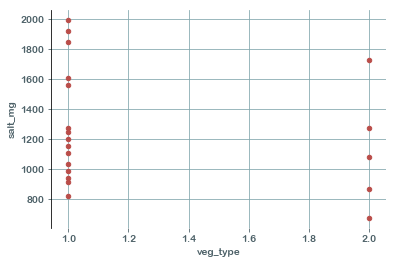

In [155]:
ax = df_blue.plot(x='veg_type', y='salt_mg', kind='scatter')
ax


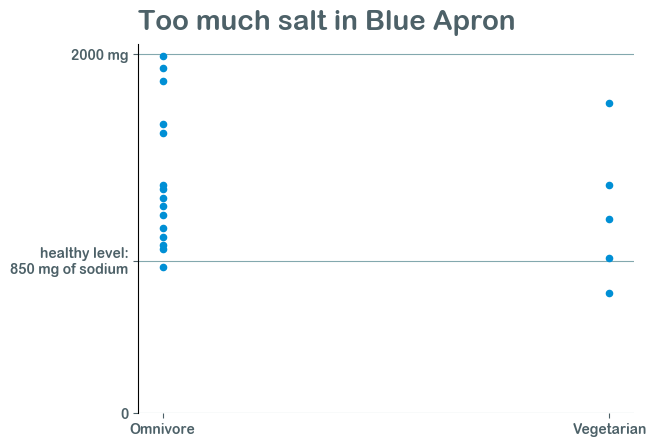

In [206]:
ax = df_blue.plot(x='veg_type', y='salt_mg', kind='scatter')
ax

ax.set_title("Too much salt in Blue Apron", pad=10, fontsize=20, loc='left')
ax.set_xticks([1,2])
ax.set_xticklabels(["Omnivore", "Vegetarian"])
ax.set_yticks([0,850,2000])
ax.set_yticklabels(["0","healthy level:\n850 mg of sodium","2000 mg"])
ax_gc.tick_params(which='major', bottom=False)

ax.grid(False, axis='x')
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
#ax.grid(False, axis='y')
#ax.tick_params(labeltop=True, labelbottom=False)
#ax.tick_params(left=False)
#ax.tick_params(bottom=False)
#plt.gcf().text(0.12, 0.98, "Number of deaths caused by foodborne outbreaks from 1998 to 2016", ha='left', fontsize=12)
#"Number of deaths caused by foodborne outbreaks from 1998 to 2016"
#plt.savefig("foodkills1_allfoods.pdf", transparent=True)
plt.savefig("blueapron.pdf", transparent=True)


In [81]:
df_test = pd.read_csv("test.csv", sep=';')

In [82]:
df_test

,Nutrition Facts,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,2 serving per container,NaN,NaN
2,Serving size(436g),NaN,NaN
3,Amount per serving,NaN,NaN
4,Calories590,NaN,NaN
5,% Daily Value*,NaN,NaN
6,Total Fat 16g,21 %,NaN
7,NaN,Saturated Fat 1.5g,8 %
8,NaN,Trans Fat 0g,NaN
9,Cholesterol 65mg,22 %,NaN


In [84]:
gc_omni = open("greenchef_omni.txt").read()
gc_vege = open("greenchef_vege.txt").read()

In [96]:
gc_omni

'\ufeff;;\n;;\nSESAME-CRUSTED TUNA;;\nServing size(436g);;\nAmount per serving;;\nCalories590;;\n% Daily Value*;;\nTotal Fat\xa016g;21 %;\n;Saturated Fat 1.5g;8 %\n;Trans\xa0Fat 0g;\nCholesterol\xa065mg;22 %;\nSodium\xa0790mg;34 %;\nTotal Carbohydrate\xa058g;21 %;\n;Dietary Fiber 8g;29 %\n;Total Sugars 15g;\n;Includes 5g Added Sugars;10 %\nProtein\xa053g;;\nVitamin D 3mcg;15 %;\nCalcium 123mg;10 %;\nIron 5mg;30 %;\nPotassium 1538mg;35 %;\nMOLE-SPICED STEAK;;\nServing size(471g);;\nAmount per serving;;\nCalories430;;\n% Daily Value*;;\nTotal Fat\xa013g;17 %;\n;Saturated Fat 7g;35 %\n;Trans\xa0Fat 0g;\nCholesterol\xa085mg;28 %;\nSodium\xa0430mg;19 %;\nTotal Carbohydrate\xa040g;15 %;\n;Dietary Fiber 7g;25 %\n;Total Sugars 11g;\n;Includes 0g Added Sugars;0 %\nProtein\xa038g;;\nVitamin D 0mcg;0 %;\nCalcium 124mg;10 %;\nIron 5mg;30 %;\nPotassium 1281mg;30 %;\n* The % Daily Value (DV) tells you how much a nutrient in a serving of food contributes to a daily diet. 2,000 calories a day is used 

In [102]:
gc_omni_salt = re.findall(r"Sodium\s(\d\d\d\d?)", gc_omni)


In [103]:
gc_vege_salt = re.findall(r"Sodium\s(\d\d\d\d?)", gc_vege)


In [108]:
df_gc_omni = pd.DataFrame(gc_omni_salt)

In [114]:
df_gc_omni['veg_type'] = 1
df_gc_omni

,0,veg_type
0,790,1
1,430,1
2,480,1
3,910,1
4,590,1
5,620,1
6,640,1
7,200,1
8,450,1
9,1270,1


In [115]:
df_gc_vege = pd.DataFrame(gc_vege_salt)
df_gc_vege['veg_type'] = 2
df_gc_vege

,0,veg_type
0,1270,2
1,930,2
2,1000,2
3,940,2
4,470,2
5,450,2
6,480,2
7,1070,2
8,710,2
9,1390,2


In [165]:
frames = [df_gc_omni,df_gc_vege]
df_gc = pd.concat(frames)
df_gc

,0,veg_type
0,790,1
1,430,1
2,480,1
3,910,1
4,590,1
5,620,1
6,640,1
7,200,1
8,450,1
9,1270,1


In [166]:
df_gc=df_gc.rename(columns = {0 :'salt_mg'})
df_gc



,salt_mg,veg_type
0,790,1
1,430,1
2,480,1
3,910,1
4,590,1
5,620,1
6,640,1
7,200,1
8,450,1
9,1270,1


In [167]:
df_gc['salt_mg'] = df_gc['salt_mg'].apply(pd.to_numeric)

In [168]:
df_gc['Company'] = "Green Chef"

In [169]:
df_gc.dtypes

salt_mg      int64
veg_type     int64
Company     object
dtype: object

In [170]:
df_gc.head()

,salt_mg,veg_type,Company
0,790,1,Green Chef
1,430,1,Green Chef
2,480,1,Green Chef
3,910,1,Green Chef
4,590,1,Green Chef


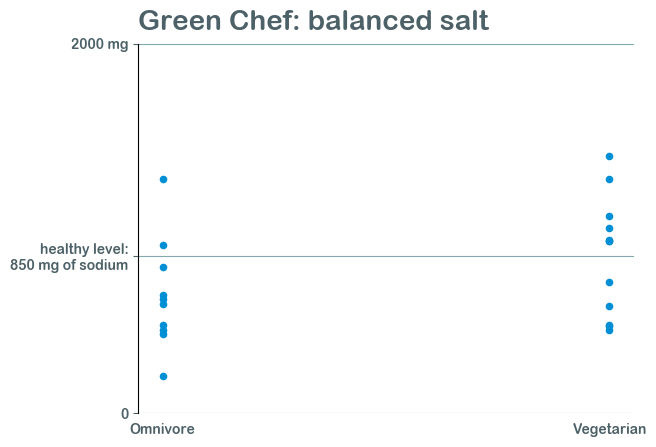

In [205]:
ax_gc = df_gc.plot(x='veg_type', y='salt_mg', kind='scatter')
ax_gc

ax_gc.set_title("Green Chef: balanced salt", pad=10, fontsize=20, loc='left')
ax_gc.set_xticks([1,2])
ax_gc.set_xticklabels(["Omnivore", "Vegetarian"])
ax_gc.set_yticks([0, 850, 2000])
ax_gc.set_yticklabels(["0","healthy level:\n850 mg of sodium", "2000 mg"])

ax_gc.tick_params(which='major', bottom=False)
ax_gc.grid(False, axis='x')
ax_gc.xaxis.label.set_visible(False)
ax_gc.yaxis.label.set_visible(False)
plt.savefig("greenchef.pdf", transparent=True)


In [172]:
frames = [df_blue,df_gc]
df_all = pd.concat(frames)
df_all

/Users/palar/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


,Company,Food,Salt,Veg,salt_mg,veg_type
0,Blue Apron,Seared Steak on Cheese Polenta,39.0,No,936.0,1
1,Blue Apron,Tuscan Pork Chops,50.0,No,1200.0,1
2,Blue Apron,Crispy Veese Quesadillas,53.0,Yes,1272.0,2
3,Blue Apron,Blackened Cajun Chicken,43.0,No,1032.0,1
4,Blue Apron,Shrimp & Pesto Cnocchi,80.0,No,1920.0,1
5,Blue Apron,Spiced Chicken & Couscous,46.0,No,1104.0,1
6,Blue Apron,Seared Cod & Peppers over Creamy Rice,34.0,No,816.0,1
7,Blue Apron,Sicilian-Style Orecchierette,28.0,Yes,672.0,2
8,Blue Apron,Seared Steaks over Cheese Polenta,38.0,No,912.0,1
9,Blue Apron,Spicy BBQ Chicken Drumsticks,67.0,No,1608.0,1


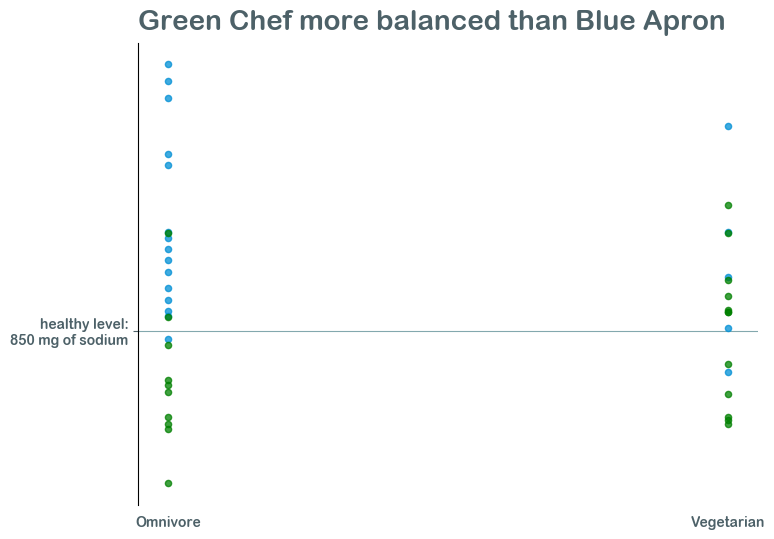

In [204]:
fig, ax = plt.subplots(figsize=(8, 6))

colors = list(reversed(plt.rcParams['axes.prop_cycle'].by_key()['color']))

groups = df_all.groupby('Company')
for name, group in groups:
    group.plot(kind='scatter', x='veg_type', y='salt_mg', color=colors.pop(), ax=ax, alpha=0.75)

ax.set_title("Green Chef more balanced than Blue Apron", pad=10, fontsize=20, loc='left')
ax.set_xticks([1,2])
ax.set_xticklabels(["Omnivore", "Vegetarian"])
ax.set_yticks([850])
ax.set_yticklabels(["healthy level:\n850 mg of sodium"])
ax.tick_params(which='major', bottom=False)

ax.grid(False, axis='x')
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
plt.savefig("all_boxes.pdf", transparent=True)
